In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sounddevice as sd
from scipy.io import wavfile
from scipy import signal
import librosa
from spafe.features.gfcc import gfcc

In [20]:
sound1 = 'Alesis-Sanctuary-QCard-Crotales-C6.wav'
sound2 = 'E-Mu-Proteus-FX-TubeBels-C6.wav'


samplerate1, data1 = wavfile.read(sound1)
samplerate2, data2 = wavfile.read(sound2)
print('Audio Shape 1:', np.shape(data1), '\n', 
      'Audio Shape 2:', np.shape(data2)
     )

Audio Shape 1: (88116, 2) 
 Audio Shape 2: (132453, 2)


C:\Users\vegam\AppData\Local\Temp\ipykernel_14496\1430996939.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate1, data1 = wavfile.read(sound1)
C:\Users\vegam\AppData\Local\Temp\ipykernel_14496\1430996939.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate2, data2 = wavfile.read(sound2)


In [21]:
data1 = data1[:, 0]
data2 = data2[:, 0]

In [67]:
sd.play(data1, samplerate1)
sd.wait()


In [68]:
sd.play(data2, samplerate2)
sd.wait()

In [24]:
duration1 = len(data1) / samplerate1
time1 = np.arange(0, duration1, 1 / samplerate1) # Vector
duration2 = len(data2) / samplerate2
time2 = np.arange(0, duration2, 1 / samplerate2) # Vector
print('Audio Duration 1:', duration1, '\n', 
      'Audio Duration 2:', duration2
     )

Audio Duration 1: 1.9980952380952381 
 Audio Duration 2: 3.003469387755102


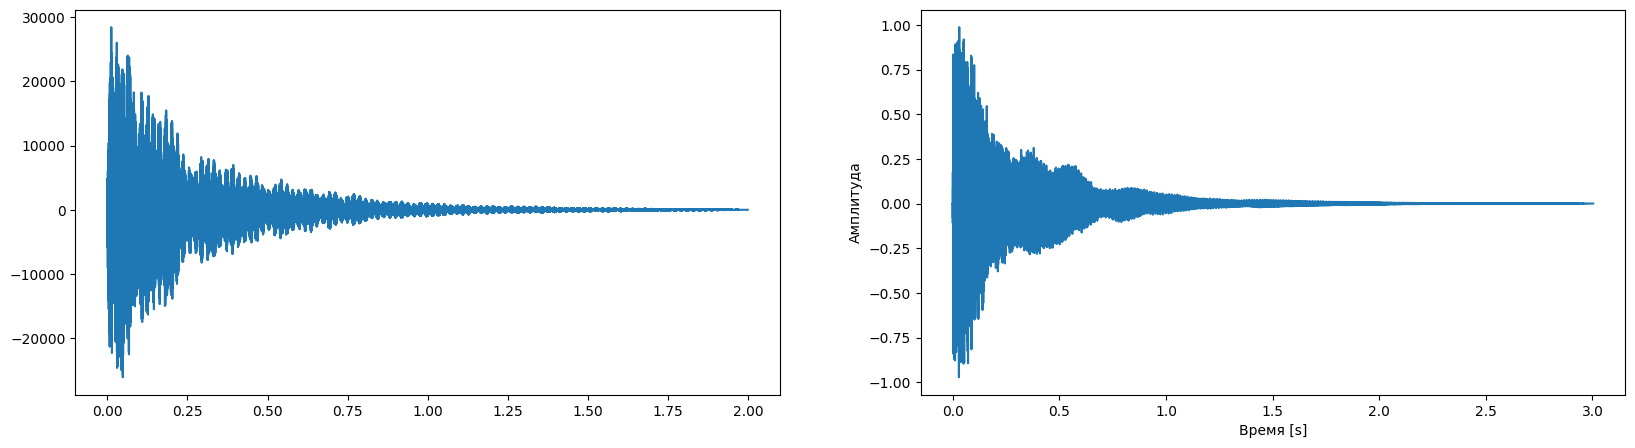

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].plot(time1, data1)
axs[1].plot(time2, data2)
plt.xlabel('Время [s]')
plt.ylabel('Амплитуда')
plt.show()

Спектрограмма

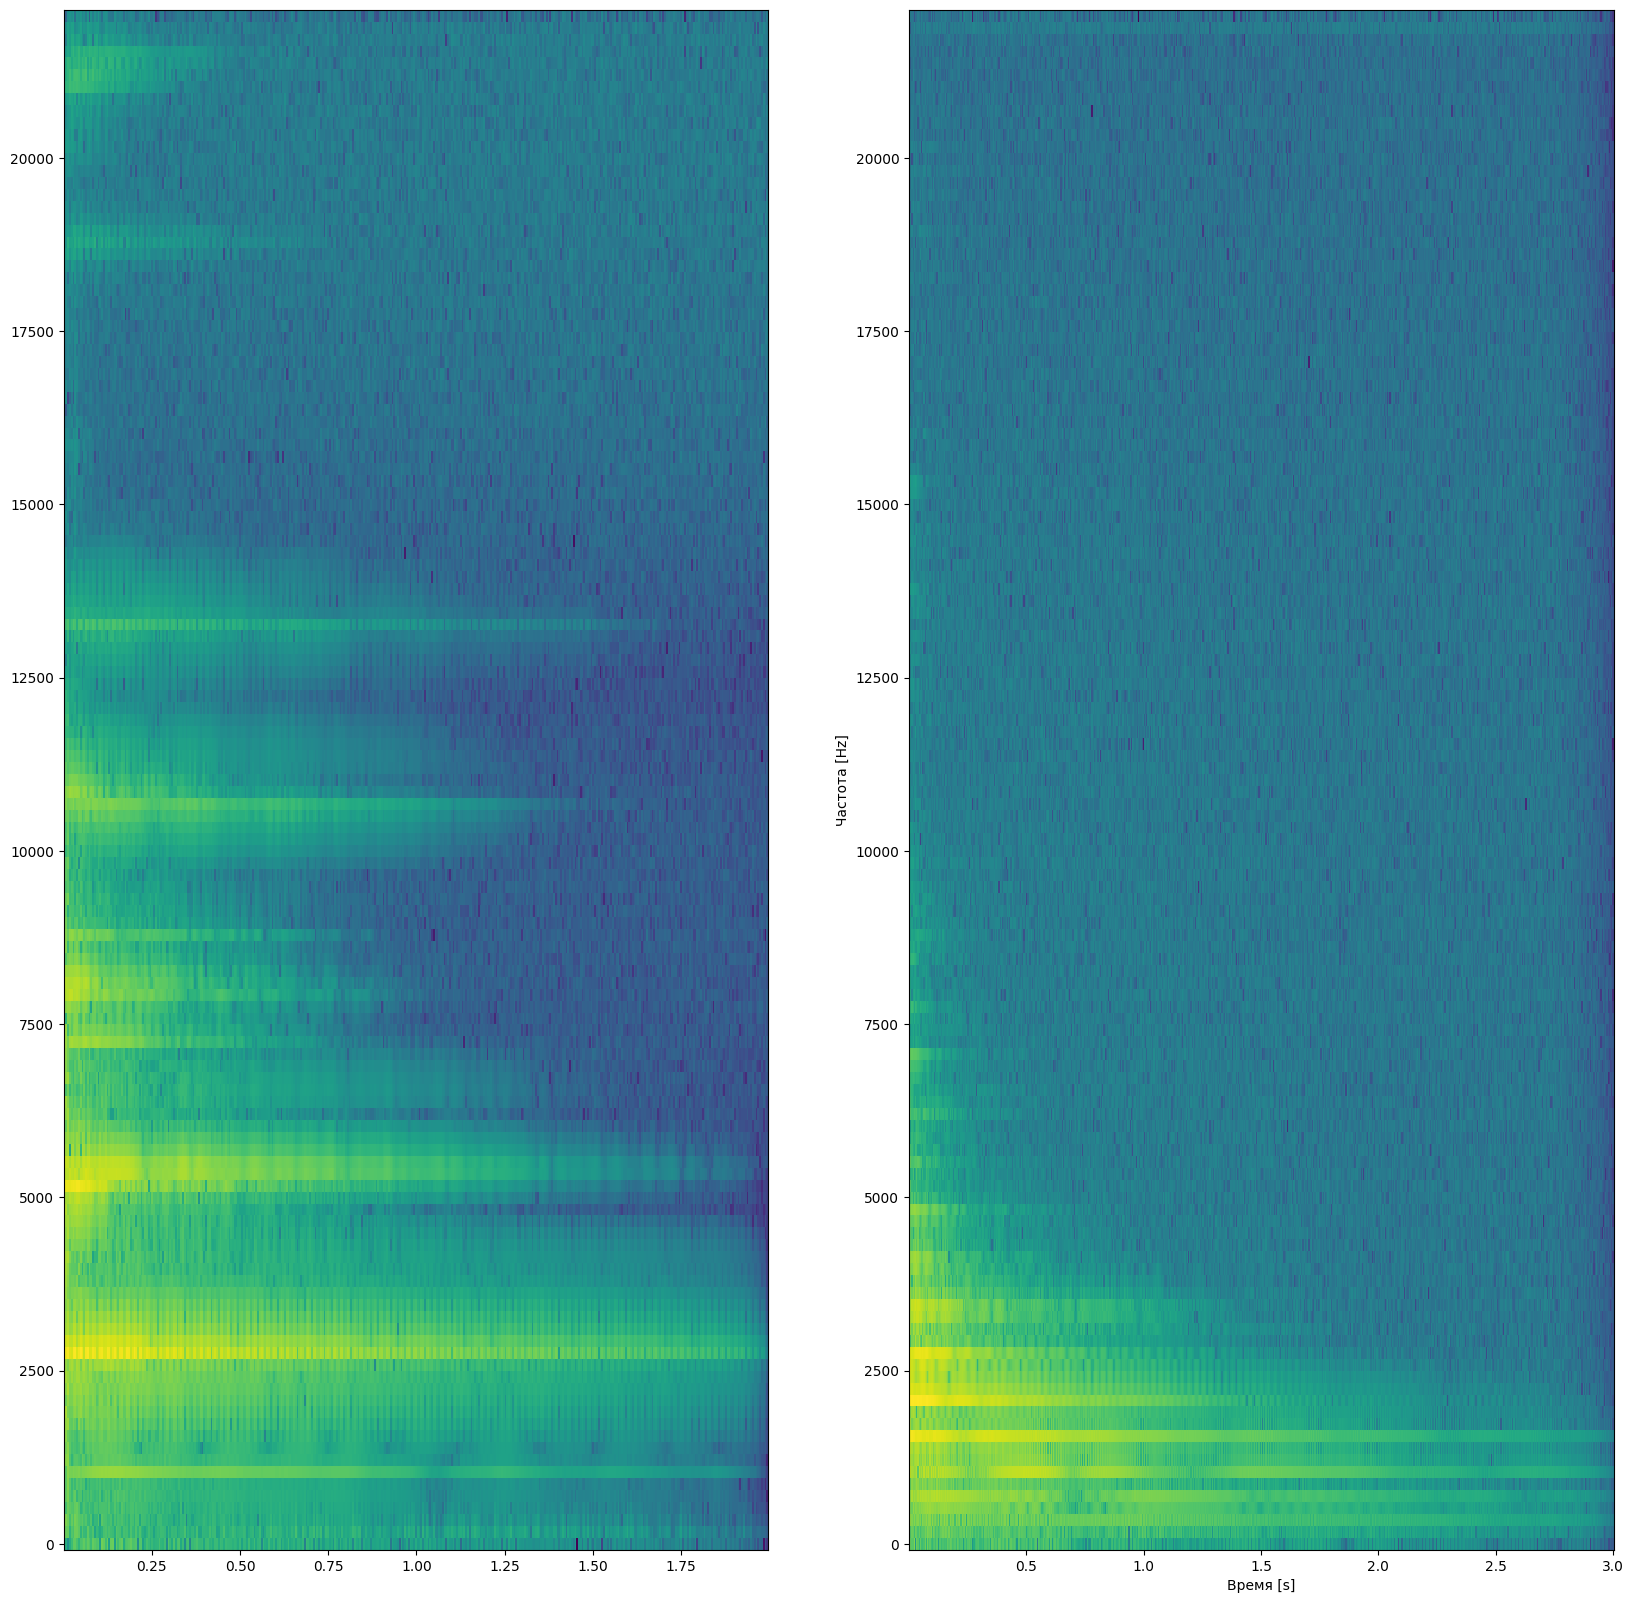

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(20, 20))
fr1, tm1, spgram1 = signal.spectrogram(x = data1, fs = samplerate1)
fr2, tm2, spgram2 = signal.spectrogram(x = data2, fs = samplerate2)

lspg1 = np.log(spgram1)
lspg2 = np.log(spgram2)
axs[0].pcolormesh(tm1, fr1, lspg1, shading='auto')
axs[1].pcolormesh(tm2, fr2, lspg2, shading='auto')
plt.ylabel('Частота [Hz]')
plt.xlabel('Время [s]')
plt.show()

Основной звук, вроде длится одинакого (Основная масса ушла за около 1.6 секунд, у второго просто более длинный хвост). Играют они одну ноту, но из-за того что на вторых колокольчиках основная часть собрана в более низких частотах, то может показаться более низким, когда у первых колокольчиков можно четко выделить верние частоты, которые "режут" ухо

In [63]:
samples1, sample_rate1 = librosa.load(sound1)

y1 = samples1
sr1 = sample_rate1
mfccs1 = librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=10)

samples2, sample_rate2 = librosa.load(sound2)

y2 = samples2
sr2 = sample_rate2
mfccs2 = librosa.feature.mfcc(y=y2, sr=sr2, n_mfcc=10)

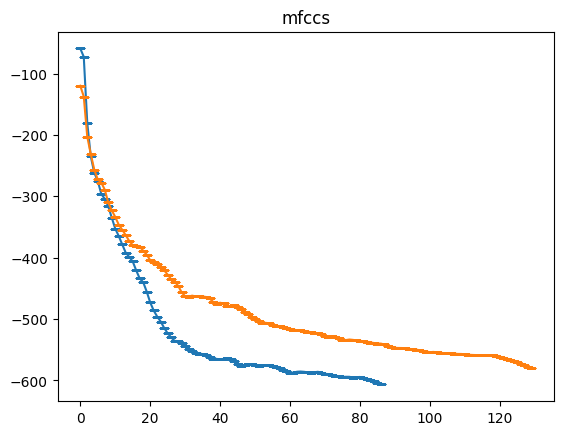

In [64]:
s1 = mfccs1[0:1, :][0, :]
t1 = [*range(len(s1))]
s2 = mfccs2[0:1, :][0, :]
t2 = [*range(len(s2))]
plt.plot(t1, s1.reshape(87, 1), marker='$aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa$')
plt.plot(t2, s2.reshape(130, 1), marker='$aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa$')
plt.title('mfccs')
plt.show()

In [65]:
samples1, sample_rate1 = librosa.load(sound1)

y1 = samples1
sr1 = sample_rate1
gfccs1 = gfcc(y1, fs=sr1, num_ceps=1)

samples2, sample_rate2 = librosa.load(sound2)

y2 = samples2
sr2 = sample_rate2
gfccs2 = gfcc(y2, fs=sr2, num_ceps=1)


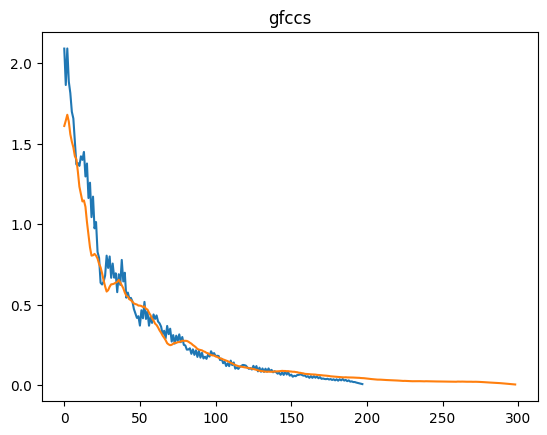

In [66]:
plt.plot(gfccs1)
plt.plot(gfccs2)
plt.title('gfccs')
plt.show()

Мел-кепстарльные и гамматон-частотные коэффициенты показывают небольшое отличие между звуками.

Графики накладываются друг на друга, но есть некое отличие, так как видим что график мел-кепстральный второго звука затухает медленнее, значит больше мощность остается